#                 Titanic Data analysis with Python

In [70]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
os.getcwd

<function nt.getcwd()>

In [72]:
os.chdir('C:\\Users\\Hp\\OneDrive\\Desktop\\PYTHON CASE STUDIES\\EXTRACTPY\\Titanic')

In [73]:
df_train=pd.read_csv('train.csv') # importing the titanic dataset 

In [74]:
df_train.head() #first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df_train.shape # 891 rows and 12 columns

(891, 12)

In [76]:
df_train.columns  #columns names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
df_train.info() # getting some info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
df_train.isnull().sum() #  checking the number of missing value in each columns 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
# we found missing value in three columns
# Age contains 177 missing value
# cabin contains 687 missing value and Embarked contains only 2 missing value


In [80]:
 # Handling the  missing values
#replacing the missing values in 'Age' column with the mean value
 df_train['Age'].fillna(df_train['Age'].median(), inplace=True) # Fill missing age



C:\Users\Hp\AppData\Local\Temp\ipykernel_34952\2789979411.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True) # Fill missing age


In [81]:
# cabin columns contains a lot of missing value so i need to drop the cabin column
df_train = df_train.drop(columns='Cabin',axis=1)


In [82]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [83]:
# Finding the mode value in Embarked column
df_train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [84]:
# replacing value in Embarked column with mode value
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_34952\1205132183.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)


In [85]:
df_train.isnull().sum() # now in this dataset does not have any missing value

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

In [86]:
# getting some statical measures from this data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [87]:
# finding the number of people who surviand not survived
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Data Visualization 

### Survival Count

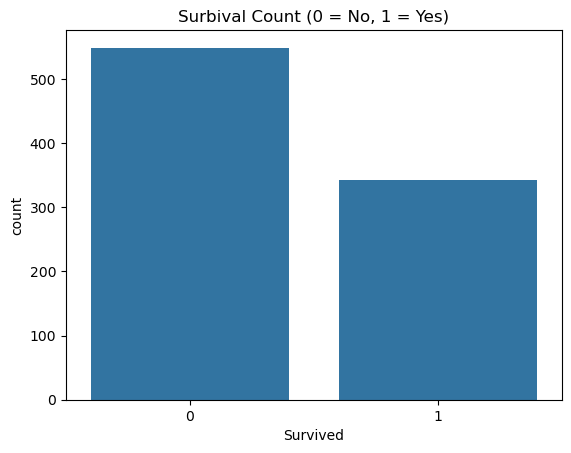

In [88]:
#making a count plot for Survived columns
sns.countplot(x='Survived', data=df_train)
plt.title('Surbival Count (0 = No, 1 = Yes)')
plt.show()

### Survival by Gender

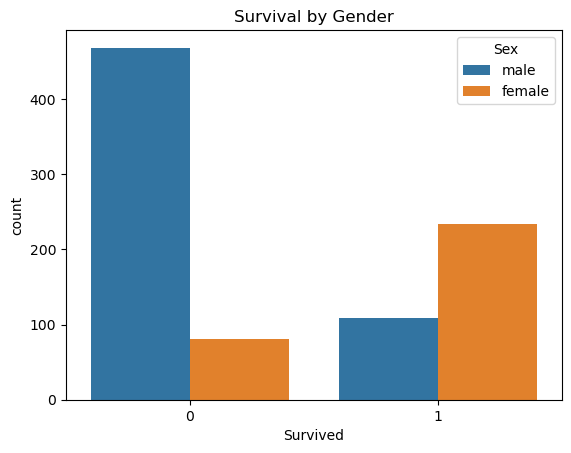

In [89]:
sns.countplot(x='Survived', hue='Sex', data = df_train)
plt.title('Survival by Gender')
plt.show()

### Survival by Passenger Class

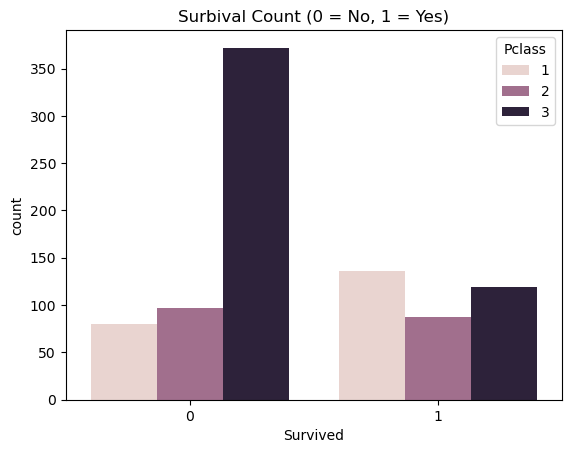

In [90]:
sns.countplot(x='Survived', hue='Pclass', data=df_train)
plt.title('Surbival Count (0 = No, 1 = Yes)')
plt.show()

### Age Distribution

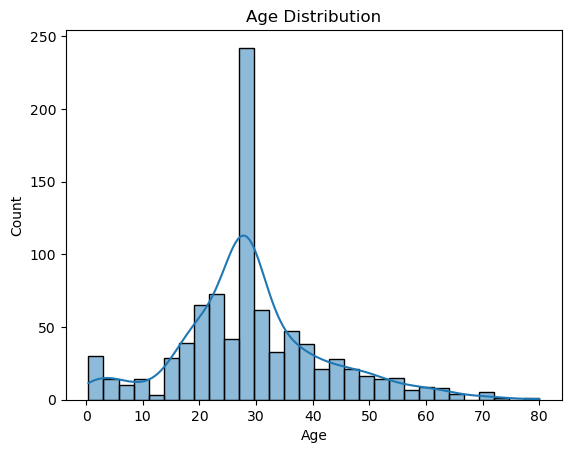

In [91]:
sns.histplot(df_train['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

### Feature Engineering

In [92]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [93]:
## Decoding the categorical columns

In [94]:
df_train['Sex']=df_train['Sex'].map({'male': 0, 'female': 1})
df_train['Embarked']=df_train['Embarked'].map({'S':0, 'C': 1, 'Q':2})


In [95]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [96]:
# Family Size 
df_train['family_size']= df_train['SibSp']+ df_train['Parch']

In [97]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family_size'],
      dtype='object')

In [98]:
# Is alone ?(0 if family size >0, else 1)
df_train['is_alone']= np.where(df_train['family_size'] > 0, 0, 1)

In [99]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


### Train- Test split

In [100]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family_size', 'is_alone'],
      dtype='object')

In [104]:
X=df_train[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'family_size', 'is_alone']]
y= df_train[['Survived']]

In [107]:
# Split into 80% train and 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [108]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


### Model Training 

In [119]:
# Logistic Regression Model

In [120]:
m1 = LogisticRegression(max_iter = 1000)
m1.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [121]:
#Predictions
y_pred = m1.predict(X_test)

In [122]:
#Accuracy
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [123]:
# Confusion Matrix

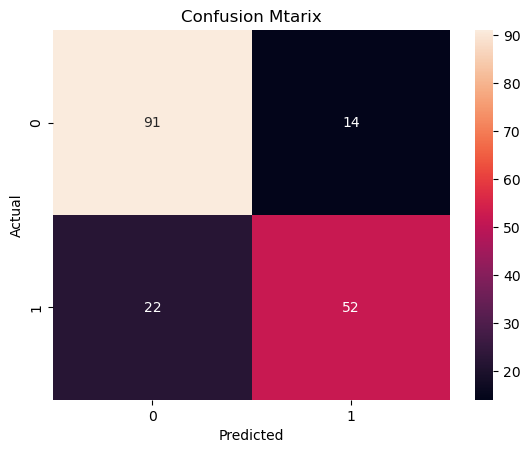

In [124]:
conf_matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Mtarix')
plt.show()

In [125]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

